In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
# Dataframes complementarios (Traducción de IDs)                                         # 1ra Columna   -> Resto de columnas
df_id_banco = pd.read_csv("Data/ExtraccionDomiVersionFinal/CatBanco.csv")                # ID Banco      -> Nombre del banco
df_id_emisora = pd.read_csv("Data/ExtraccionDomiVersionFinal/CatEmisora.csv")            # ID Emisora    -> Nombre Emisora, ID Banco, Emisora??, Tipo envío
df_id_respuesta = pd.read_csv("Data/ExtraccionDomiVersionFinal/CatRespuestaBancos.csv")  # ID Respuesta  -> Descripción
df_id_listacobro = pd.read_csv("Data/ExtraccionDomiVersionFinal/ListaCobro.csv")         # ID ListaCobro -> Fecha creación, ID Banco, Fecha envío
df_id_listaemisor = pd.read_csv("Data/ExtraccionDomiVersionFinal/ListaCobroEmisora.csv") # ID ListaCobro -> ID Emisora

# Dataframes detallados por año
df_2022 = pd.read_csv("Data/ExtraccionDomiVersionFinal/ListaCobroDetalle2022.csv")
df_2023 = pd.read_csv("Data/ExtraccionDomiVersionFinal/ListaCobroDetalle2023.csv")
df_2024 = pd.read_csv("Data/ExtraccionDomiVersionFinal/ListaCobroDetalle2024.csv")
df_2025 = pd.read_csv("Data/ExtraccionDomiVersionFinal/ListaCobroDetalle2025.csv")

cobros_detallados = pd.concat([df_2022, df_2023, df_2024, df_2025], ignore_index=True)

C:\Users\chall\AppData\Local\Temp\ipykernel_23176\2370501616.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv("Data/ExtraccionDomiVersionFinal/ListaCobroDetalle2023.csv")


In [67]:
# Standardize column names
df_id_banco = df_id_banco.rename(columns={'IdBanco': 'idBanco', 'Nombre': 'nombreBanco'})
df_id_respuesta = df_id_respuesta.rename(columns={'IdRespuestaBanco': 'idRespuestaBanco'})
df_id_emisora = df_id_emisora.rename(columns={'Nombre': 'nombreEmisora'})

# Drop duplicated columns
df_id_emisora = df_id_emisora.drop('IdBanco', axis=1)

In [68]:
# Merge ID columns
cobros_detallados = cobros_detallados.merge(df_id_banco, on='idBanco', how='left') # Obtener nombre de banco
cobros_detallados = cobros_detallados.merge(df_id_respuesta, on='idRespuestaBanco', how='left') # Obtener descripción de respuesta
cobros_detallados = cobros_detallados.merge(df_id_listaemisor, on='idListaCobro', how='left') # Obtener ID emisora
#cobros_detallados = cobros_detallados.merge(df_id_emisora, on='idEmisora', how='left') # Obtener datos de emisora

In [69]:
cobros_detallados.head(20)

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,nombreBanco,Descripcion,idEmisora
0,100613,83021,27169966,2,572.24,572.24,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51
1,100613,87227,27169937,2,517.74,517.74,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51
2,100613,103785,27169946,2,681.23,681.23,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51
3,100613,110463,27169969,2,572.24,572.24,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51
4,100613,113755,27169948,2,340.62,340.62,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51
5,100613,118237,27169957,2,272.50,272.50,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51
6,100613,136004,27169958,2,361.06,361.06,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51
7,100613,137382,27169934,2,393.94,393.94,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51
8,100613,137885,27169970,2,289.02,289.02,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51
9,100613,149399,27169968,2,572.24,572.24,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51


In [70]:
patron_exito = r'\b(Exitosa|ENTREGADO|Cuenta correcta en la validaci[oó]n de cuentas)\b'
patron_reintentable = r'\b(Fondos|Insuficiencia|fuera de horario|Error.*proceso|Bajo [Pp]ago|rechazada temporal)\b'
patron_definitivo = r'\b(Inexistente|Bloqueada|Cancelada|no pertenece|no admite|Orden de no pagar|Importe mayor|Cliente desconoce|Caracteres Inv[áa]lidos|Dato err[oó]neo|Operaci[oó]n Inv[áa]lida|Bloqueo a todos|Inconsistencia|Reverso del cargo|No se proceso|Convenio cerrado|Fraude|Dejo de pagar|Pago irregular|Fuera de politica|Saldo menor|Amparo|Licencia|Defunci[oó]n|Baja por jubilaci[oó]n|Baja dependencia|Sin pago|rechazada|TRANSACCI\?N RECHAZADA|cancelaci[oó]n del servicio|sin autorizaci[oó]n)\b'

cobros_detallados["es_exito"] = cobros_detallados["Descripcion"].str.contains(patron_exito, case=False, regex=True)
cobros_detallados["es_falla_reintentable"] = cobros_detallados["Descripcion"].str.contains(patron_reintentable, case=False, regex=True)
cobros_detallados["es_falla_definitiva"] = cobros_detallados["Descripcion"].str.contains(patron_definitivo, case=False, regex=True)
cobros_detallados.head(20)
# Prioridad: Éxito > Definitiva > Reintentable
#$cobros_detallados["es_falla_reintentable"] = cobros_detallados["es_falla_reintentable"] & ~cobros_detallados["es_exito"]
#cobros_detallados["es_falla_definitiva"] = cobros_detallados["es_falla_definitiva"] & ~cobros_detallados["es_exito"] & ~cobros_detallados["es_falla_reintentable"]

# Validación final: todo lo no clasificado como definitivo
#sin_clasificar = ~cobros_detallados[["es_exito", "es_falla_reintentable", "es_falla_definitiva"]].any(axis=1)
#cobros_detallados.loc[sin_clasificar, "es_falla_definitiva"] = True

C:\Users\chall\AppData\Local\Temp\ipykernel_23176\2795872220.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cobros_detallados["es_exito"] = cobros_detallados["Descripcion"].str.contains(patron_exito, case=False, regex=True)
C:\Users\chall\AppData\Local\Temp\ipykernel_23176\2795872220.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cobros_detallados["es_falla_reintentable"] = cobros_detallados["Descripcion"].str.contains(patron_reintentable, case=False, regex=True)
C:\Users\chall\AppData\Local\Temp\ipykernel_23176\2795872220.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cobros_detallados["es_falla_definitiva"] = cobros_detallados["Descripcion"].str.contains(patron_definitivo, case=False, regex=True)


,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,nombreBanco,Descripcion,idEmisora,es_exito,es_falla_reintentable,es_falla_definitiva
0,100613,83021,27169966,2,572.24,572.24,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,False,True,False
1,100613,87227,27169937,2,517.74,517.74,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,False,True,False
2,100613,103785,27169946,2,681.23,681.23,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,False,True,False
3,100613,110463,27169969,2,572.24,572.24,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,False,True,False
4,100613,113755,27169948,2,340.62,340.62,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,False,True,False
5,100613,118237,27169957,2,272.50,272.50,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,False,True,False
6,100613,136004,27169958,2,361.06,361.06,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,False,True,False
7,100613,137382,27169934,2,393.94,393.94,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,False,True,False
8,100613,137885,27169970,2,289.02,289.02,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,False,True,False
9,100613,149399,27169968,2,572.24,572.24,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,False,True,False


In [73]:
cobros_detallados["es_exito"] = cobros_detallados["es_exito"].astype(bool)
cobros_detallados["es_falla_reintentable"] = cobros_detallados["es_falla_reintentable"].astype(bool)
cobros_detallados["es_falla_definitiva"] = cobros_detallados["es_falla_definitiva"].astype(bool)


In [74]:
cobros_ordenados = cobros_detallados.sort_values(by=["idCredito", "consecutivoCobro"]).copy()
cobros_ordenados["es_falla_reintentable_real"] = False

for id_credito, grupo in cobros_ordenados.groupby("idCredito"):
    exito_indices = grupo.index[grupo["es_exito"]]
    
    if not exito_indices.empty:
        primer_exito_pos = grupo.loc[exito_indices[0], "consecutivoCobro"]
        reintentar_mask = (grupo["es_falla_reintentable"]) & (grupo["consecutivoCobro"] < primer_exito_pos)
    else:
        reintentar_mask = grupo["es_falla_reintentable"]
    
    cobros_ordenados.loc[grupo[reintentar_mask].index, "es_falla_reintentable_real"] = True


In [75]:
cobros_ordenados[["idCredito", "consecutivoCobro", "Descripcion", "es_exito", "es_falla_reintentable", "es_falla_reintentable_real"]].head(20)

,idCredito,consecutivoCobro,Descripcion,es_exito,es_falla_reintentable,es_falla_reintentable_real
220987,6,29066707,NaN,True,True,False
1278180,6,32697369,NaN,True,True,False
220988,560,29066708,NaN,True,True,False
216074,773,29059961,NaN,True,True,False
220989,773,29066709,NaN,True,True,False
216075,1154,29062362,NaN,True,True,False
220990,1154,29066710,NaN,True,True,False
216076,1315,29062129,NaN,True,True,False
220991,1315,29066711,NaN,True,True,False
216077,1340,29058151,NaN,True,True,False


In [76]:
def estado_final(grupo):
    if grupo["es_exito"].any():
        return "exitoso"
    elif grupo["es_falla_definitiva"].any():
        return "fallo_definitivo"
    elif grupo["es_falla_reintentable_real"].any():
        return "fallo_reintentable_final"
    else:
        return "desconocido"

estado_por_credito = cobros_ordenados.groupby("idCredito").apply(estado_final)
estado_por_credito.name = "estado_final"

cobros_ordenados = cobros_ordenados.merge(estado_por_credito, on="idCredito")

C:\Users\chall\AppData\Local\Temp\ipykernel_23176\1965268280.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  estado_por_credito = cobros_ordenados.groupby("idCredito").apply(estado_final)


In [92]:
cobros_ordenados["estado_final"].value_counts()


estado_final
exitoso                     10045705
fallo_reintentable_final        6846
fallo_definitivo                4763
desconocido                      126
Name: count, dtype: int64

In [95]:
creditos_unicos = cobros_ordenados[["idCredito", "estado_final"]].drop_duplicates()

conteo = creditos_unicos["estado_final"].value_counts()

porcentaje = (conteo / conteo.sum() * 100).round(2)

resumen = pd.DataFrame({
    "creditos_unicos": conteo,
    "porcentaje": porcentaje.astype(str) + "%"
})

print(resumen)


                          creditos_unicos porcentaje
estado_final                                        
exitoso                             94857     97.56%
fallo_reintentable_final             1395      1.43%
fallo_definitivo                      892      0.92%
desconocido                            86      0.09%


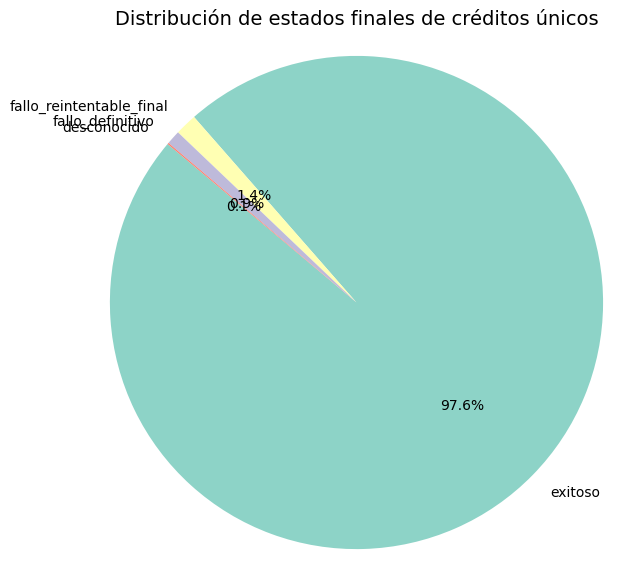

In [97]:
labels = resumen.index
sizes = resumen["creditos_unicos"]
colors = plt.cm.Set3.colors  # Paleta de colores
plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

plt.title("Distribución de estados finales de créditos únicos", fontsize=14)
plt.axis('equal')  
plt.show()



In [98]:
pagos_exitosos = cobros_ordenados[cobros_ordenados["es_exito"]].groupby("idCredito").size()
pagos_exitosos.name = "pagos_realizados"


In [100]:
pagos_exitosos_df = pagos_exitosos.reset_index()
pagos_exitosos


idCredito
6          2
560        1
773        2
1154       2
1315       2
          ..
755683     1
755695     1
755726     1
755859    16
756595     5
Name: pagos_realizados, Length: 94857, dtype: int64

In [101]:
todos_los_creditos = cobros_ordenados[["idCredito"]].drop_duplicates()
resumen_pagos = todos_los_creditos.merge(
    pagos_exitosos.reset_index(),
    on="idCredito",
    how="left"
)

resumen_pagos["pagos_realizados"] = resumen_pagos["pagos_realizados"].fillna(0).astype(int)


In [102]:
resumen_pagos

,idCredito,pagos_realizados
0,6,2
1,560,1
2,773,2
3,1154,2
4,1315,2
...,...,...
97225,755683,1
97226,755695,1
97227,755726,1
97228,755859,16


In [116]:
solicitudes_por_credito = cobros_detallados.groupby("idCredito").size().reset_index(name="num_solicitudes")
pagos_exitosos_por_credito = cobros_detallados[cobros_detallados["es_exito"]].groupby("idCredito").size().reset_index(name="num_pagos")
comparacion = solicitudes_por_credito.merge(pagos_exitosos_por_credito, on="idCredito", how="left")

comparacion["num_pagos"] = comparacion["num_pagos"].fillna(0).astype(int)
comparacion["tasa_exito"] = comparacion["num_pagos"] / comparacion["num_solicitudes"]


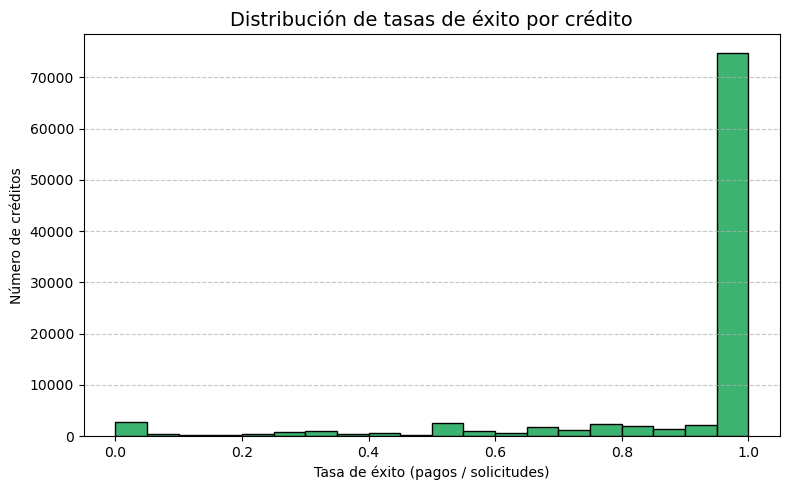

In [123]:
plt.figure(figsize=(8, 5))
plt.hist(comparacion["tasa_exito"], bins=20, color="mediumseagreen", edgecolor="black")

plt.title("Distribución de tasas de éxito por crédito", fontsize=14)
plt.xlabel("Tasa de éxito (pagos / solicitudes)")
plt.ylabel("Número de créditos")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
num_tasa_0 = (comparacion["tasa_exito"] == 0).sum()
print(f"Número de créditos con tasa de éxito 0: {num_tasa_0}")

AttributeError: 'numpy.int64' object has no attribute 'groupby'

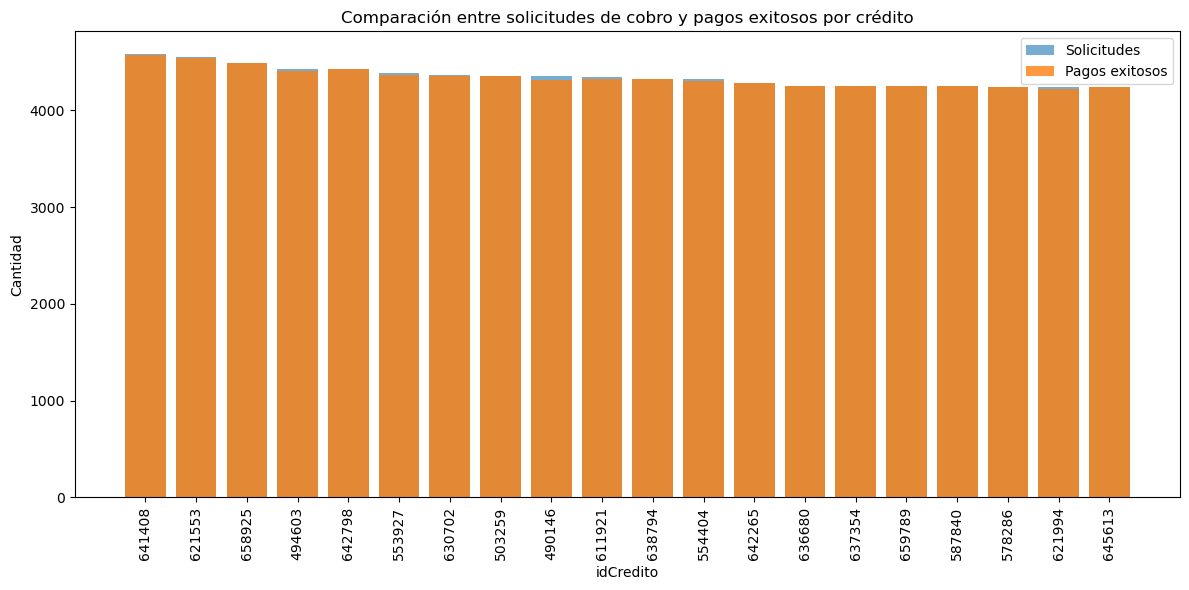

In [ ]:

# Seleccionamos los 20 créditos con menos solicitudes
top_20 = comparacion.sort_values("num_solicitudes", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_20["idCredito"].astype(str), top_20["num_solicitudes"], label="Solicitudes", alpha=0.6)
plt.bar(top_20["idCredito"].astype(str), top_20["num_pagos"], label="Pagos exitosos", alpha=0.8)

plt.xlabel("idCredito")
plt.ylabel("Cantidad")
plt.title("Comparación entre solicitudes de cobro y pagos exitosos por crédito")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
